<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/Mini%20Project%202/MP2_Q3_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.1

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##Downloading Data

In [ ]:
!gdown 1JJv6_0V1q686YSAAyznO41SY-RhTnNM8
#https://drive.google.com/file/d/1JJv6_0V1q686YSAAyznO41SY-RhTnNM8/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1JJv6_0V1q686YSAAyznO41SY-RhTnNM8
To: /content/Company_Data.csv
100% 16.6k/16.6k [00:00<00:00, 26.0MB/s]


##Loading Data

In [ ]:
df=pd.read_csv('/content/Company_Data.csv')
df.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.shape

(400, 11)

In [ ]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

#3.2

#Data Preprocessing

##Missing Values Check

In [ ]:
total_missing_values = df.isnull().sum()
print(total_missing_values)


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [ ]:
df = df.dropna()
print(df)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0          

#Checking For Duplicate Values

In [ ]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []


In [ ]:
num_duplicates = duplicate.sum()
print(num_duplicates)

Sales          0.0
CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
ShelveLoc        0
Age              0
Education        0
Urban            0
US               0
dtype: object


#Encoding Specific Columns

##Checking Unique Values

In [ ]:
unique_us = df['US'].unique()
print(f"Unique values in 'US': {unique_us}")

unique_urban = df['Urban'].unique()
print(f"Unique values in 'Urban': {unique_urban}")

unique_shelveloc = df['ShelveLoc'].unique()
print(f"Unique values in 'ShelveLoc': {unique_shelveloc}")

Unique values in 'US': ['Yes' 'No']
Unique values in 'Urban': ['Yes' 'No']
Unique values in 'ShelveLoc': ['Bad' 'Good' 'Medium']


##Encoding

In [ ]:
df['US'] = df['US'].map({'Yes': 1, 'No': 0})

df['Urban'] = df['Urban'].map({'Yes': 1, 'No': 0})

shelve_loc_mapping = {'Bad': 0, 'Medium': 1, 'Good': 2}
df['ShelveLoc'] = df['ShelveLoc'].map(shelve_loc_mapping)
print(df)

     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          2   65   
2    10.06        113      35           10         269     80          1   59   
3     7.40        117     100            4         466     97          1   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          2   33   
396   6.14        139      23            3          37    120          1   55   
397   7.41        162      26           12         368    159          1   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          2   49   

     Education  Urban  US  

#Creating classes categorical for 'Sales'(target)

In [ ]:
import pandas as pd

lower_threshold = df['Sales'].quantile(0.25)
upper_threshold = df['Sales'].quantile(0.75)

def classify_sales(sale):
  if sale < lower_threshold:
    return 'Low'
  elif lower_threshold <= sale < upper_threshold:
    return 'Average'
  else:
    return 'High'

df['sales_category'] = df['Sales'].apply(classify_sales)

print(df[['Sales', 'sales_category']].head())

   Sales sales_category
0   9.50           High
1  11.22           High
2  10.06           High
3   7.40        Average
4   4.15            Low


##Encoding The Target

In [ ]:
print(df)

     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0     9.50        138      73           11         276    120          0   42   
1    11.22        111      48           16         260     83          2   65   
2    10.06        113      35           10         269     80          1   59   
3     7.40        117     100            4         466     97          1   55   
4     4.15        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395  12.57        138     108           17         203    128          2   33   
396   6.14        139      23            3          37    120          1   55   
397   7.41        162      26           12         368    159          1   40   
398   5.94        100      79            7         284     95          0   50   
399   9.71        134      37            0          27    120          2   49   

     Education  Urban  US s

#Correlation Matrix

##Libraries

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

#Visualize Correlation

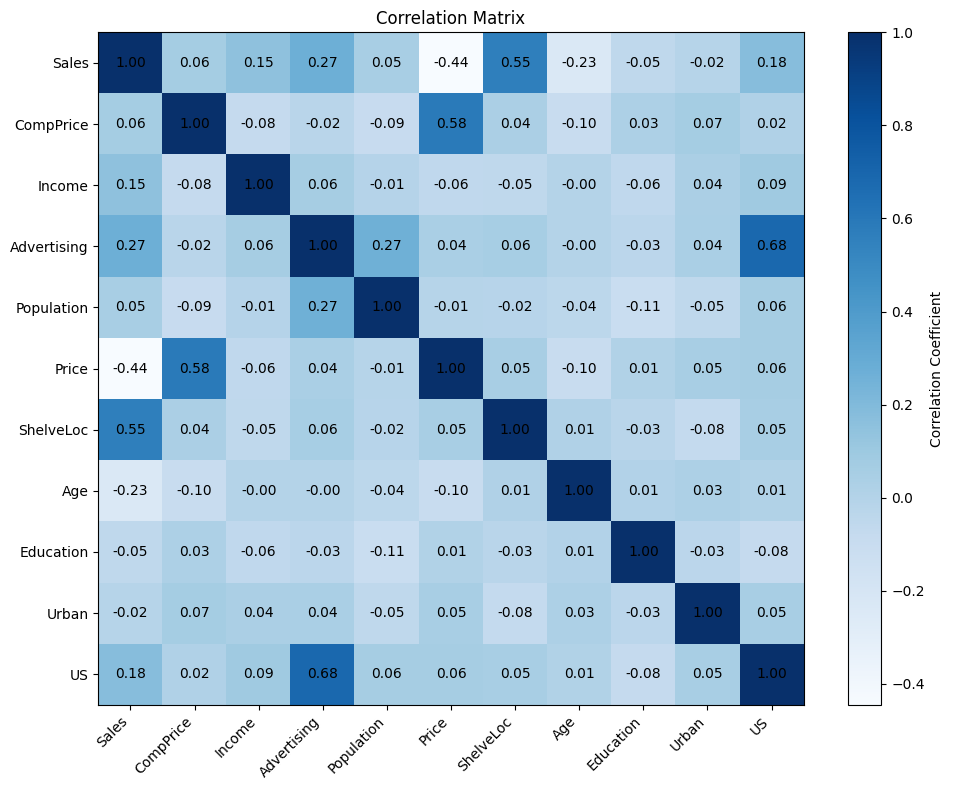

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_corr = df.drop('sales_category', axis=1)
matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='Blues', aspect='auto')

plt.colorbar(label='Correlation Coefficient')

variables = list(matrix.columns)
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)


for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(j, i, f'{matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

#3.3

#Entropy Function

In [ ]:
def calculate_entropy(y):
  p=y.value_counts()/len(y)
  return -sum(p*np.log2(p))

In [ ]:
calculate_entropy(df['sales_category'])

1.5048921531889055

#Information Gain

In [ ]:
#Entropy parent
target='sales_category'
entropy_parent=calculate_entropy(df[target])
entropy_parent

1.5048921531889055

In [ ]:
df_decision=df.drop(columns=['Sales'])
df_decision

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,2,65,10,1,1,High
2,113,35,10,269,80,1,59,12,1,1,High
3,117,100,4,466,97,1,55,14,1,1,Average
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,High
396,139,23,3,37,120,1,55,11,0,1,Average
397,162,26,12,368,159,1,40,18,1,1,Average
398,100,79,7,284,95,0,50,12,1,1,Average


In [ ]:
def info_gain(child, parent):
  entropy_parent = calculate_entropy(df_decision[parent])
  entropy_child = 0
  for value in df_decision[child].unique():
    subset = df_decision[df_decision[child] == value]
    wi = len(subset) / len(df_decision)
    entropy_child += wi * calculate_entropy(subset[parent])
  return entropy_parent - entropy_child

In [ ]:
[info_gain(child,'sales_category')for child in df_decision.iloc[:,:-1].columns]


[0.2758720550312612,
 0.3863889199861923,
 0.1711463382656071,
 1.0979071843902273,
 0.5045506613035591,
 0.21696325881276635,
 0.2740560143774946,
 0.038713297455754914,
 0.0004156927492624529,
 0.039363678964506654]

#Grid Search

##Libraries

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

##Train_Test_Split

In [ ]:
df_grid=df.drop(columns=['Sales'])
X=df_grid.drop(columns=['sales_category'])
y=df_grid['sales_category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

##Applying GridSearch

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dtree_clf = DecisionTreeClassifier(random_state=34)
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dtree_clf = grid_search.best_estimator_
y_pred = best_dtree_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test Accuracy: {accuracy}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test Accuracy: 0.7


In [ ]:
pruned_model = grid_search.best_estimator_

train_accuracy_pruned = pruned_model.score(X_train, y_train)
test_accuracy_pruned = pruned_model.score(X_test, y_test)

In [ ]:
print(train_accuracy_pruned)
print(test_accuracy_pruned)

0.846875
0.7


##Plotting the tree

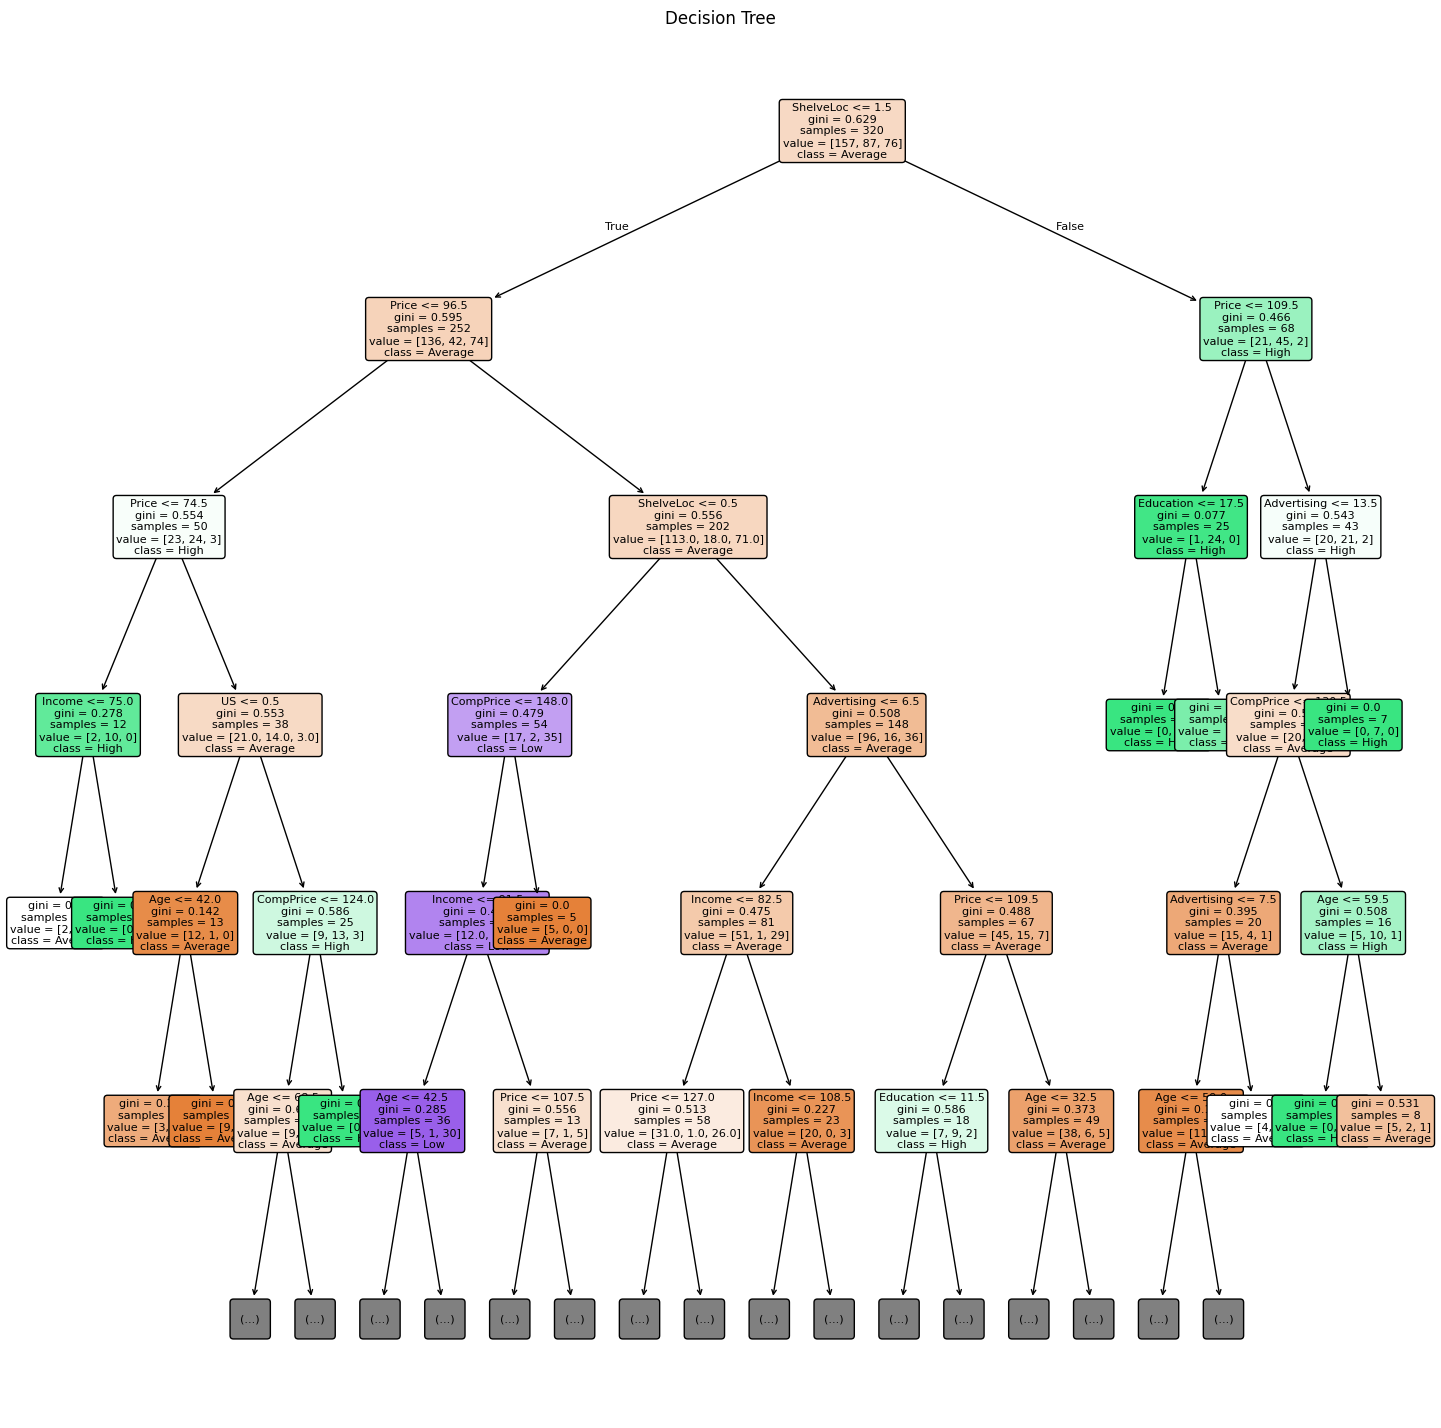

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = X_train.columns
class_names = y_train.unique().astype(str)

plt.figure(figsize=(18, 18))
plot_tree(best_dtree_clf,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=5)
plt.title("Decision Tree")
plt.show()

--- Model Evaluation ---
Test Accuracy: 0.7000

--- Classification Report ---
              precision    recall  f1-score   support

     Average       0.69      0.80      0.74        41
        High       0.54      0.47      0.50        15
         Low       0.84      0.67      0.74        24

    accuracy                           0.70        80
   macro avg       0.69      0.65      0.66        80
weighted avg       0.71      0.70      0.70        80


--- Confusion Matrix ---


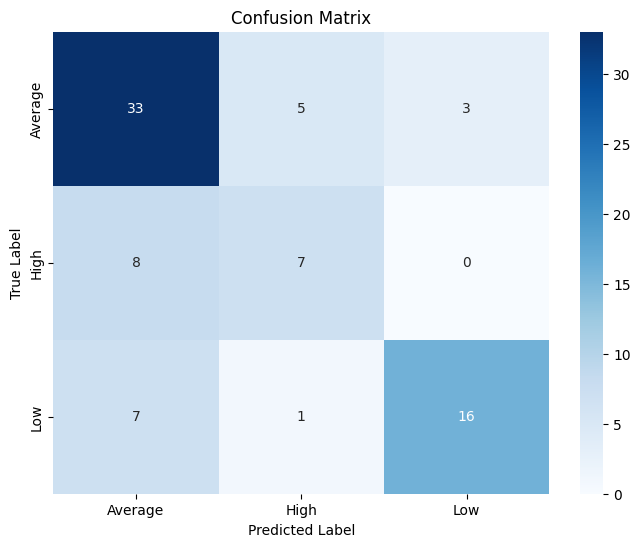


--- Confusion Matrix Analysis ---
Class: Average
  True Positive (TP): 33
  False Positive (FP): 15
  False Negative (FN): 8
  True Negative (TN): 24
--------------------
Class: High
  True Positive (TP): 7
  False Positive (FP): 6
  False Negative (FN): 8
  True Negative (TN): 59
--------------------
Class: Low
  True Positive (TP): 16
  False Positive (FP): 3
  False Negative (FN): 8
  True Negative (TN): 53
--------------------


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_pred = best_dtree_clf.predict(X_test)

print("--- Model Evaluation ---")

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=class_names))

print("\n--- Confusion Matrix ---")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


print("\n--- Confusion Matrix Analysis ---")
for i in range(len(class_names)):
    print(f"Class: {class_names[i]}")
    print(f"  True Positive (TP): {cm[i, i]}")
    print(f"  False Positive (FP): {np.sum(cm[:, i]) - cm[i, i]}")
    print(f"  False Negative (FN): {np.sum(cm[i, :]) - cm[i, i]}")
    print(f"  True Negative (TN): {np.sum(cm) - np.sum(cm[:, i]) - np.sum(cm[i, :]) + cm[i, i]}")
    print("-" * 20)

#Is the tree overfitting?

In [ ]:

print(f"Training Accuracy: {train_accuracy_pruned}")
print(f"Testing Accuracy: {test_accuracy_pruned}")

if abs(train_accuracy_pruned - test_accuracy_pruned) > 0.1:
  print("The model might be overfitting.")
elif train_accuracy_pruned < test_accuracy_pruned:
    print("The model might be underfitting.")
else:
  print("The model seems to generalize well.")


Training Accuracy: 0.846875
Testing Accuracy: 0.7
The model might be overfitting.
